homework 5
对于同一个星系，画出SDSS和Hubble的（尽量同一波段）fits图像的对比。
    采用相同的灰度(color bar)
    定出星系的中心(流量最高点)
        计算其赤经赤纬

(array([386]), array([456]))
<SkyCoord (ICRS): (ra, dec) in deg
    [(195.35878332, 27.88594505)]>


Text([1056], [986], '(195.3587, 27.8859)')

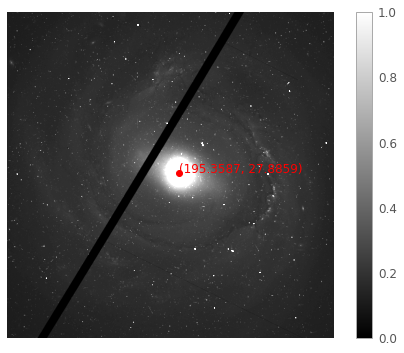

In [1]:
## NGC 4921 RA = 195.358960  Dec = 27.885940

import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np 

#HST
HST_file = get_pkg_data_filename('hst_10842_b1_acs_wfc_f606w_09_drz.fits')
# fits.info(HST_file)
image_data = fits.getdata(HST_file)

hdu = fits.open('hst_10842_b1_acs_wfc_f606w_09_drz.fits') 
wcs = WCS(hdu[0].header)

plt.figure()
plt.axis("off")
plt.imshow(image_data[2000:4000, 2000:4000], vmin=0, vmax=1, cmap='gray')
plt.colorbar()
plt.grid(None)

i = np.where((image_data[2600:3200, 2600:3200]==image_data[2600:3200, 2600:3200].max( )))
print(i)

plt.scatter(i[1]+600,i[0]+600, color='r')

sky = wcs.pixel_to_world(i[1]+2600, i[0]+2600)
print(sky)

plt.annotate('(195.3587, 27.8859)', xy=(i[1]+600, i[0]+600),color='r')

Filename: frame-r-005115-5-0153.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   
<SkyCoord (ICRS): (ra, dec) in deg
    [(195.34693965, 27.75986569)]>


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text([174], [155], '(195.3469, 27.7598)')

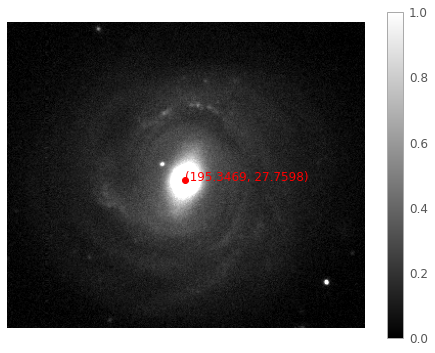

In [2]:
#sdss
sdss_file = get_pkg_data_filename('frame-r-005115-5-0153.fits')
fits.info(sdss_file)
image_data = fits.getdata(sdss_file)

sdss = fits.open('frame-r-005115-5-0153.fits')
w = WCS(sdss[0].header)

plt.figure()
plt.axis("off")
plt.imshow(image_data[:300, 1150:1500], vmin=0, vmax=1, cmap='gray')
plt.colorbar()
plt.grid(None)

i = np.where((image_data[:300, 1150:1500]==image_data[:300, 1150:1500].max( )))
plt.scatter(i[1], i[0], color='r')

sky = w.pixel_to_world(i[1], i[0])
print(sky)

plt.annotate('(195.3469, 27.7598)', xy=(i[1], i[0]),color='r')

 ### 为什么SDSS和Hubble算出来的星系的中心坐标差距很大？
 ### 想想用pixel_to_worl的输入应该是什么？学会不用程序，自己计算更有价值。
 ### try np.argmax给出数组最大值的位置

homework6
1个本地（红移为0 ）重子物质为10^11 Msun的星系，假设其物质密度分布为指数盘形式，指数盘的scale-length 为 3Kpc，该星系所在的暗物质晕的质量为10^12Msun，暗物质的物质密度轮廓服从NFW分布（c=10），该星系的运动为旋转的盘，请画出该星系的旋转曲线。

/tmp/ipykernel_3625998/3291919733.py:17: RuntimeWarning: invalid value encountered in true_divide
  vr = ((G*Mr)/(r*1e-3))**0.5  #km/s h^1/3 Msun^2 Mpc^1/2  ??


Text(0, 0.5, 'Vr')

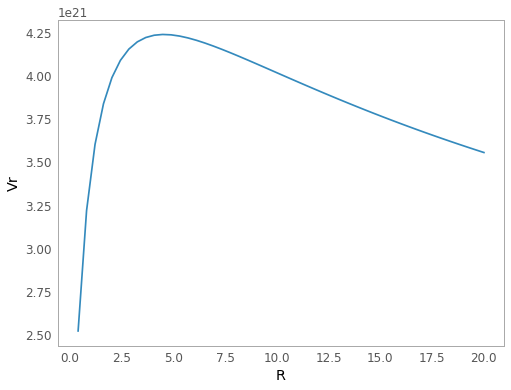

In [3]:
c = 10
delta0 = 200/3*c**3/(np.log(1+c)-c/(1+c))
rho_crit = 3.3e11 #h^2 Msun Mpc^-3
rho0 = rho_crit*delta0 #1.48e16 h^2 Msun Mpc^-3
# print(rho0)

rho_r200 = rho_crit*delta0/(c*(1+c)**2) #1.22e13 h^2 Msun Mpc^-3
# print(rho_r200)

#rho_r200 = rho0*exp(-r200/rd) = 1.22e13  => r200 = 21kpc => rs = 2.1kpc
rs = 2.1

# NFW Mr = 4*pi*rho0**3*ln(1+r/rs)-r/rs/(1+r/rs)
r = np.linspace(0,20,50)
Mr = 4*np.pi*rho0**3*(np.log(1+r/rs)-r/rs/(1+r/rs)) 
G = 4.301e-9 #km^2 Mpc Msun^-1 s^-2
vr = ((G*Mr)/(r*1e-3))**0.5  #km/s h^1/3 Msun^2 Mpc^1/2  ??

plt.plot(r, vr)
plt.grid(False)
plt.xlabel('R')
plt.ylabel('Vr')

In [ ]:
### 这个只是暗晕的，没有包含盘的